# AMMI Day 9

## Morning Session
### Sequence Models - Time Series Data - RNN - GRU - LSTM

In [1]:
!pip install tensorflow-gpu==2.0.0.beta0

     |████████████████████████████████| 348.9MB 88kB/s 
     |████████████████████████████████| 501kB 28.2MB/s 
     |████████████████████████████████| 3.1MB 16.4MB/s 


In [23]:
#this version of numpy is required to avoid an error related to numpy defaulting to not allowing pickle files
!pip install numpy==1.16.2

In [24]:
!pip install pandas==0.24

In [0]:
import tensorflow as tf
from tensorflow.keras import datasets, preprocessing, models, layers
import numpy as np
import pandas as pd

In [114]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
df = pd.read_csv('/content/gdrive/My Drive/temperature/jena_climate_2009_2016.csv')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
Date Time          420551 non-null object
p (mbar)           420551 non-null float64
T (degC)           420551 non-null float64
Tpot (K)           420551 non-null float64
Tdew (degC)        420551 non-null float64
rh (%)             420551 non-null float64
VPmax (mbar)       420551 non-null float64
VPact (mbar)       420551 non-null float64
VPdef (mbar)       420551 non-null float64
sh (g/kg)          420551 non-null float64
H2OC (mmol/mol)    420551 non-null float64
rho (g/m**3)       420551 non-null float64
wv (m/s)           420551 non-null float64
max. wv (m/s)      420551 non-null float64
wd (deg)           420551 non-null float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [29]:
df[['Date Time']].head()

,Date Time
0,01.01.2009 00:10:00
1,01.01.2009 00:20:00
2,01.01.2009 00:30:00
3,01.01.2009 00:40:00
4,01.01.2009 00:50:00


In [0]:
df = df[['Date Time', 'T (degC)']]
df['DateTime'] = pd.to_datetime(df['Date Time'], format="%d.%m.%Y %H:%M:%S")

In [31]:
df.head()

,Date Time,T (degC),DateTime
0,01.01.2009 00:10:00,-8.02,2009-01-01 00:10:00
1,01.01.2009 00:20:00,-8.41,2009-01-01 00:20:00
2,01.01.2009 00:30:00,-8.51,2009-01-01 00:30:00
3,01.01.2009 00:40:00,-8.31,2009-01-01 00:40:00
4,01.01.2009 00:50:00,-8.27,2009-01-01 00:50:00


In [32]:
df.set_index(['DateTime'])

,Date Time,T (degC)
DateTime,,
2009-01-01 00:10:00,01.01.2009 00:10:00,-8.02
2009-01-01 00:20:00,01.01.2009 00:20:00,-8.41
2009-01-01 00:30:00,01.01.2009 00:30:00,-8.51
2009-01-01 00:40:00,01.01.2009 00:40:00,-8.31
2009-01-01 00:50:00,01.01.2009 00:50:00,-8.27
2009-01-01 01:00:00,01.01.2009 01:00:00,-8.05
2009-01-01 01:10:00,01.01.2009 01:10:00,-7.62
2009-01-01 01:20:00,01.01.2009 01:20:00,-7.62
2009-01-01 01:30:00,01.01.2009 01:30:00,-7.91


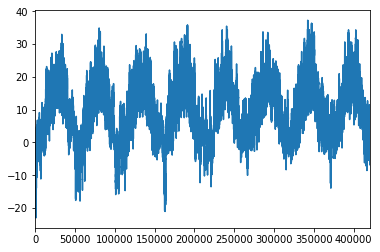

In [40]:
df['T (degC)'].plot()

### Extract Time Series DF

In [0]:
time_series_df = df.set_index(['DateTime'])

In [42]:
time_series_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420551 entries, 2009-01-01 00:10:00 to 2017-01-01 00:00:00
Data columns (total 2 columns):
Date Time    420551 non-null object
T (degC)     420551 non-null float64
dtypes: float64(1), object(1)
memory usage: 9.6+ MB


In [0]:
time_series_df.drop(['Date Time'], axis=1, inplace=True)

### Resample to Mean Daily Temperature

In [44]:
mean_daily_temp = time_series_df.resample('D').mean()
mean_daily_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2923 entries, 2009-01-01 to 2017-01-01
Freq: D
Data columns (total 1 columns):
T (degC)    2921 non-null float64
dtypes: float64(1)
memory usage: 45.7 KB


### Create Training and Test

In [0]:
test_daily_temp = mean_daily_temp['2016']
train_daily_temp = mean_daily_temp['2009':'2015']

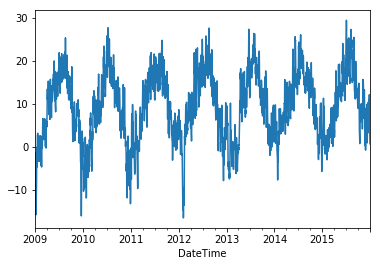

In [46]:
train_daily_temp['T (degC)'].plot()

In [47]:
train_daily_temp.head()

,T (degC)
DateTime,
2009-01-01,-6.810629
2009-01-02,-3.728194
2009-01-03,-5.271736
2009-01-04,-1.375208
2009-01-05,-4.867153


### Reset Index

In [0]:
train_daily_temp.reset_index(inplace=True)
train_daily_temp.reset_index(inplace=True)

In [49]:
test_daily_temp.reset_index(inplace=True)
test_daily_temp.reset_index(inplace=True)
test_daily_temp.head()

,index,DateTime,T (degC)
0,0,2016-01-01,0.249236
1,1,2016-01-02,-0.975486
2,2,2016-01-03,-1.578056
3,3,2016-01-04,-2.081111
4,4,2016-01-05,-1.761319


### Extract Time Steps

In [0]:
train_x = train_daily_temp[['index']].to_numpy()
train_y = train_daily_temp[['T (degC)']].to_numpy()

test_x = test_daily_temp[['index']].to_numpy()
test_y = test_daily_temp[['T (degC)']].to_numpy()

### Create a Generator

In [0]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [0]:
N_INPUT = 5
BATCH_SIZE = 16

In [0]:
train_gen = TimeseriesGenerator(train_x, train_y, length=N_INPUT, sampling_rate=7, batch_size=BATCH_SIZE)

In [0]:
test_gen = TimeseriesGenerator(test_x, test_y, length=N_INPUT, sampling_rate=7, batch_size=BATCH_SIZE)

### Inspect one item

In [55]:
batch_0 = train_gen[0]
x, y = batch_0
print(y.shape)

(16, 1)


In [56]:
print(x.shape)

(16, 1, 1)


### Dense Model

In [57]:
model = models.Sequential([
    layers.Dense(100, input_shape=(x.shape[1], x.shape[2]), activation='relu'),
    layers.Flatten(),
    layers.Dense(1)
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 100)            200       
_________________________________________________________________
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.compile(optimizer='adam', loss='mse')

In [59]:
model.fit_generator(train_gen, epochs=5)

Epoch 1/5
160/160 [==============================] - 2s 10ms/step - loss: 228.1278
Epoch 2/5
160/160 [==============================] - 1s 4ms/step - loss: 284.4241
Epoch 3/5
160/160 [==============================] - 1s 4ms/step - loss: 90.7404
Epoch 4/5
160/160 [==============================] - 1s 4ms/step - loss: 125.4818
Epoch 5/5
160/160 [==============================] - 1s 4ms/step - loss: 120.0193


In [60]:
example = test_gen[0]
x, y = example
y_pred = model.predict(x)
print('Actual: {} | Predicted: {}'.format(y[0], y_pred[0]))

Actual: [-4.46013889] | Predicted: [0.3703911]


### Train an RNN

In [74]:
rnn_model = models.Sequential([
    layers.SimpleRNN(100, input_shape=(x.shape[1], x.shape[2]), dropout=0.5, recurrent_dropout=0.5),
    layers.Dense(1)
])
print(rnn_model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, 100)               10200     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________
None


In [75]:
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit_generator(train_gen, epochs=5)

Epoch 1/5
160/160 [==============================] - 2s 13ms/step - loss: 110.8186
Epoch 2/5
160/160 [==============================] - 1s 6ms/step - loss: 83.4383
Epoch 3/5
160/160 [==============================] - 1s 6ms/step - loss: 73.0213
Epoch 4/5
160/160 [==============================] - 1s 6ms/step - loss: 65.7694
Epoch 5/5
160/160 [==============================] - 1s 6ms/step - loss: 62.7219


In [66]:
y_pred = rnn_model.predict(x)
print('Actual: {} | Predicted: {}'.format(y[0], y_pred[0]))

Actual: [-4.46013889] | Predicted: [8.321369]


### Train an LSTM

In [67]:
lstm_model = models.Sequential([
    layers.Bidirectional(layers.LSTM(100, return_sequences=True, recurrent_dropout=0.5), input_shape=(x.shape[1], x.shape[2])),
    layers.Bidirectional(layers.LSTM(100, recurrent_dropout=0.5)),
    layers.Dense(1)
])
print(lstm_model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 1, 200)            81600     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               240800    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 201       
Total params: 322,601
Trainable params: 322,601
Non-trainable params: 0
_________________________________________________________________
None


In [68]:
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit_generator(train_gen, epochs=5)

Epoch 1/5
160/160 [==============================] - 8s 48ms/step - loss: 72.4816
Epoch 2/5
160/160 [==============================] - 3s 18ms/step - loss: 60.4115
Epoch 3/5
160/160 [==============================] - 3s 18ms/step - loss: 59.8599
Epoch 4/5
160/160 [==============================] - 3s 18ms/step - loss: 59.9470
Epoch 5/5
160/160 [==============================] - 3s 18ms/step - loss: 59.7052


In [69]:
y_pred = lstm_model.predict(x)
print('Actual: {} | Predicted: {}'.format(y[0], y_pred[0]))

Actual: [-4.46013889] | Predicted: [-0.45228332]


## Afternoon Session
### Language Models - Encodings - Embeddings - LSTM - 1D-CNN

### IMDB

In [0]:
imdb = datasets.imdb

#Let's work with a dictionary of 20,000 words
NUM_WORDS = 20000

In [0]:
#load IMDB dataset as lists of integers
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=NUM_WORDS, )

In [0]:
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k: (v+3) for k, v in word_index.items()}
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2
word_index['<UNUSED>'] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [97]:
print(' '.join([reverse_word_index[i] for i in train_data[0]]))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be p

In [98]:
print(train_labels[0])

1


In [100]:
print(train_labels[:5])

[1 0 0 1 0]


In [101]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


* inspect the length of each review

In [102]:
print('Len 0: {}, Len 1: {}, Len 2: {}'.format(len(train_data[0]), len(train_data[1]), len(train_data[2])))

Len 0: 218, Len 1: 189, Len 2: 141


In [0]:
LEN_WORDS = 300
train_data = preprocessing.sequence.pad_sequences(train_data, maxlen=LEN_WORDS)
test_data = preprocessing.sequence.pad_sequences(test_data, maxlen=LEN_WORDS)

In [104]:
print('Len 0: {}, Len 1: {}, Len 2: {}'.format(len(train_data[0]), len(train_data[1]), len(train_data[2])))

Len 0: 300, Len 1: 300, Len 2: 300


### DNN

In [105]:
dense_model = models.Sequential([
    layers.Dense(300, input_shape=(300,), activation='relu'),
    layers.Dense(300, activation='relu'),
    layers.Dense(300, activation='relu'),
    layers.Dense(300, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
print(dense_model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_12 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_13 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_14 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 301       
Total params: 361,501
Trainable params: 361,501
Non-trainable params: 0
_________________________________________________________________
None


In [106]:
dense_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dense_model.fit(train_data, train_labels, epochs=10)

Train on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 3s 129us/sample - loss: 7.7035 - accuracy: 0.5006
Epoch 2/10
25000/25000 [==============================] - 3s 123us/sample - loss: 7.7125 - accuracy: 0.5000
Epoch 3/10
25000/25000 [==============================] - 3s 122us/sample - loss: 7.7125 - accuracy: 0.5000
Epoch 4/10
25000/25000 [==============================] - 3s 122us/sample - loss: 7.7125 - accuracy: 0.5000
Epoch 5/10
25000/25000 [==============================] - 3s 121us/sample - loss: 7.7125 - accuracy: 0.5000
Epoch 6/10
25000/25000 [==============================] - 3s 124us/sample - loss: 7.7125 - accuracy: 0.5000
Epoch 7/10
25000/25000 [==============================] - 3s 124us/sample - loss: 7.7125 - accuracy: 0.5000
Epoch 8/10
25000/25000 [==============================] - 3s 122us/sample - loss: 7.7125 - accuracy: 0.5000
Epoch 9/10
25000/25000 [==============================] - 3s 122us/sample - loss: 7.7125 - accuracy: 0.5000
Epoch

### Embeddings

In [107]:
DIMENSION = 16

e_model = models.Sequential([
    layers.Embedding(NUM_WORDS, DIMENSION, input_length=LEN_WORDS),
    layers.GlobalAveragePooling1D(),
    layers.Dense(1, activation='sigmoid')
])
print(e_model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 16)           320000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 17        
Total params: 320,017
Trainable params: 320,017
Non-trainable params: 0
_________________________________________________________________
None


In [108]:
e_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
e_model.fit(train_data, train_labels, epochs=3)

Train on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 7s 283us/sample - loss: 0.6402 - accuracy: 0.7431
Epoch 2/3
25000/25000 [==============================] - 7s 273us/sample - loss: 0.4800 - accuracy: 0.8368
Epoch 3/3
25000/25000 [==============================] - 7s 274us/sample - loss: 0.3708 - accuracy: 0.8758


### Embeddings plus LSTM

In [109]:
l_model = models.Sequential([
    layers.Embedding(NUM_WORDS, DIMENSION, input_length=LEN_WORDS),
    layers.LSTM(DIMENSION * 2),
    layers.Dense(1, activation='sigmoid')
])
print(l_model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 16)           320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                6272      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total params: 326,305
Trainable params: 326,305
Non-trainable params: 0
_________________________________________________________________
None


In [110]:
l_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
l_model.fit(train_data, train_labels, epochs=3)

Train on 25000 samples
Epoch 1/3
  800/25000 [..............................] - ETA: 29:10 - loss: 0.6933 - accuracy: 0.5050

KeyboardInterrupt: ignored

### Embeddings plus Convolution

In [111]:
c_model = models.Sequential([
    layers.Embedding(NUM_WORDS, DIMENSION, input_length=LEN_WORDS),
    layers.SeparableConv1D(filters=10, kernel_size=3, strides=3, padding='same'),
    layers.GlobalAveragePooling1D(),
    layers.Dense(1, activation='sigmoid')
])
print(c_model.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 16)           320000    
_________________________________________________________________
separable_conv1d (SeparableC (None, 100, 10)           218       
_________________________________________________________________
global_average_pooling1d_1 ( (None, 10)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 11        
Total params: 320,229
Trainable params: 320,229
Non-trainable params: 0
_________________________________________________________________
None


In [112]:
c_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
c_model.fit(train_data, train_labels, epochs=3)

Train on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 10s 417us/sample - loss: 0.4898 - accuracy: 0.7592
Epoch 2/3
25000/25000 [==============================] - 8s 333us/sample - loss: 0.2297 - accuracy: 0.9132
Epoch 3/3
25000/25000 [==============================] - 8s 326us/sample - loss: 0.1366 - accuracy: 0.9524


### Amazon Reviews Dataset
* http://jmcauley.ucsd.edu/data/amazon/

In [0]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('/content/gdrive/My Drive/amazon_reviews/reviews_Automotive_5.json.gz')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20473 entries, 0 to 20472
Data columns (total 9 columns):
reviewerID        20473 non-null object
asin              20473 non-null object
reviewerName      20260 non-null object
helpful           20473 non-null object
reviewText        20473 non-null object
overall           20473 non-null float64
summary           20473 non-null object
unixReviewTime    20473 non-null int64
reviewTime        20473 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 1.6+ MB


In [117]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A3F73SC1LY51OO,B00002243X,Alan Montgomery,"[4, 4]",I needed a set of jumper cables for my new car...,5.0,Work Well - Should Have Bought Longer Ones,1313539200,"08 17, 2011"
1,A20S66SKYXULG2,B00002243X,alphonse,"[1, 1]","These long cables work fine for my truck, but ...",4.0,Okay long cables,1315094400,"09 4, 2011"
2,A2I8LFSN2IS5EO,B00002243X,Chris,"[0, 0]",Can't comment much on these since they have no...,5.0,Looks and feels heavy Duty,1374710400,"07 25, 2013"
3,A3GT2EWQSO45ZG,B00002243X,DeusEx,"[19, 19]",I absolutley love Amazon!!! For the price of ...,5.0,Excellent choice for Jumper Cables!!!,1292889600,"12 21, 2010"
4,A3ESWJPAVRPWB4,B00002243X,E. Hernandez,"[0, 0]",I purchased the 12' feet long cable set and th...,5.0,"Excellent, High Quality Starter Cables",1341360000,"07 4, 2012"


In [0]:
df = df[['reviewText', 'overall']]

In [119]:
print(df['reviewText'][0])

I needed a set of jumper cables for my new car and these had good reviews and were at a good price.  They have been used a few times already and do what they are supposed to - no complaints there.What I will say is that 12 feet really isn't an ideal length.  Sure, if you pull up front bumper to front bumper they are plenty long, but a lot of times you will be beside another car or can't get really close.  Because of this, I would recommend something a little longer than 12'.Great brand - get 16' version though.


### Remove Special Characters

In [0]:
import re

def strip_special_chars(st):
    my_pattern = '[A-Za-z0-9./ ]+'
    return ''.join(re.findall(my_pattern, st))

In [121]:
df['cleanReviewText'] = df['reviewText'].apply(strip_special_chars)
print(df['cleanReviewText'][0])

I needed a set of jumper cables for my new car and these had good reviews and were at a good price.  They have been used a few times already and do what they are supposed to  no complaints there.What I will say is that 12 feet really isnt an ideal length.  Sure if you pull up front bumper to front bumper they are plenty long but a lot of times you will be beside another car or cant get really close.  Because of this I would recommend something a little longer than 12.Great brand  get 16 version though.


### Convert Ratings to Sentiment

In [122]:
def sentiment(x):
    if x < 3:
        return 0
    else:
        return 1
df['sentiment'] = df['overall'].apply(lambda x: sentiment(x))
df[['cleanReviewText', 'overall', 'sentiment']].head()

,cleanReviewText,overall,sentiment
0,I needed a set of jumper cables for my new car...,5.0,1
1,These long cables work fine for my truck but t...,4.0,1
2,Cant comment much on these since they have not...,5.0,1
3,I absolutley love Amazon For the price of a s...,5.0,1
4,I purchased the 12 feet long cable set and the...,5.0,1


### create features and labels

In [0]:
features = df['cleanReviewText']
labels = df['sentiment']

### Get a pre-trained embedding

In [0]:
import tensorflow_hub as hub

In [0]:
hub_layer = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1", output_shape=[50], input_shape=[], dtype=tf.string)

### Add pre-trained layer to a model

In [125]:
from tensorflow import keras

model = keras.Sequential([
    hub_layer,
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 50)                48190600  
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 408       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 9         
Total params: 48,191,017
Trainable params: 417
Non-trainable params: 48,190,600
_________________________________________________________________
None


In [126]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x=features.to_numpy(), y=labels.to_numpy(), epochs=1, validation_split=0.3)

Train on 14331 samples, validate on 6142 samples
14331/14331 [==============================] - 5s 382us/sample - loss: 0.2784 - accuracy: 0.9432 - val_loss: 0.2388 - val_accuracy: 0.9430


In [130]:
model = keras.Sequential([
    hub_layer,
    keras.layers.Conv1D(filters=10, kernel_size=3),
    keras.layers.Dense(1, activation='sigmoid')
])
print(model.summary())

ValueError: ignored